In [11]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import svm, tree
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict, LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.mixture import GaussianMixture

import random
from datetime import datetime


from sklearn import linear_model
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

###############################################################################################################################

Data

###############################################################################################################################

In [12]:
Y_is = pd.read_excel('Y_is.xlsx').set_index('Reaction')
Y_oos = pd.read_excel('Y_oos.xlsx').set_index('Reaction')

In [13]:
#iminium + nucleophile scaled
X_total_is_scaled = pd.read_excel('X (all features, IS, scaled).xlsx').set_index('Reaction')
X_total_oos_scaled = pd.read_excel('X (all features, OOS, scaled).xlsx').set_index('Reaction')

In [14]:
#iminium + nucleophile not scaled
X_total_is = pd.read_excel('X (all features, IS, not scaled).xlsx').set_index('Reaction')
X_total_oos = pd.read_excel('X (all features, OOS, not scaled).xlsx').set_index('Reaction')

In [15]:
catalyst_columns = ['arhs', 'alhs', 'aavg', 'b', 'AREA(q)', 'sin(AREA)',
 'Lwhole R', 'B1whole R', 'B5whole R', 'L2 R', 'B12 R', 'B52 R',
 'L3 R', 'B13 R', 'B53 R', 'L4 R', 'B14 R', 'B54 R',
 'L5 R', 'B15 R', 'B55 R', 'L6 R', 'B16 R', 'B56 R',
 'C1 R', 'C2 R', 'C3 R', 'C4 R', 'C5 R', 'C6 R',
 'Lwhole L', 'B1whole L', 'B5whole L', 'L2 L', 'B12 L', 'B52 L',
 'L3 L', 'B13 L', 'B53 L', 'L4 L', 'B14 L', 'B54 L',
 'L5 L', 'B15 L', 'B55 L', 'L6 L', 'B16 L', 'B56 L',
 'C1 L', 'C2 L', 'C3 L', 'C4 L', 'C5 L', 'C6 L',
 'Lwhole A', 'B1whole A', 'B5whole A', 'L2 A', 'B12 A', 'B52 A', 
 'L3 A', 'B13 A', 'B53 A', 'L4 A', 'B14 A', 'B54 A',
 'L5 A', 'B15 A', 'B55 A', 'L6 A', 'B16 A', 'B56 A',
 'C1 A', 'C2 A', 'C3 A', 'C4 A', 'C5 A', 'C6 A',
 'nPOsy', 'iPOsy', 'nPOas', 'iPOas', 'P', 'PNMR']

In [16]:
nucleophile_columns = ['H (nucleophile)', 'X', 'Nu', 'nXH', 'iXH', 'HOMO (nucleophile)',
 'LUMO (nucleophile)', 'Polarizability (nucleophile)', 'L', 'B1', 'B5', 'bond distance H-X',
 'H-X-Nu', 'H-X-CNu']

In [17]:
solvent_columns = ['First Zagreb', 'First Zagreb index by valence vertex degrees', 'Second Zagreb', 'Second Zagreb index by valence vertex degrees', 'Polarity',
 'Narumi Simple Topological', 'Narumi Harmonic Topological', 'Narumi Geometric Topological', 'Total structure connectivity',
 'Wiener', 'Mean Wiener', 'Xu', 'Quadratic', 'Radial centric', 'Mean Square Distance Balaban', 'Superpendentic',
 'Harary', 'Log of product of row sums', 'Pogliani', 'Schultz Molecular Topological', 'Schultz Molecular Topological by valence vertex degrees',
 'Mean Distance Degree Deviation', 'Ramification', 'Gutman Molecular Topological', 'Gutman MTI by valence vertex degrees',
 'Average vertex distance degree', 'Unipolarity', 'Centralization', 'Variation', 'Molecular electrotopological variation',
 'Maximal electrotopological positive variation', 'Maximal electrotopological negative variation',
 'Eccentric connectivity', 'Eccentricity', 'Average eccentricity', 'Eccentric',
 'Valence connectivity index chi-0', 'Valence connectivity index chi-1', 'Valence connectivity index chi-2', 'Valence connectivity index chi-3',
 'Valence connectivity index chi-4', 'Valence connectivity index chi-5', 'Average valence connectivity index chi-0', 'Average valence connectivity index chi-1',
 'Average valence connectivity index chi-2', 'Average valence connectivity index chi-3', 'Average valence connectivity index chi-4',
 'Average valence connectivity index chi-5', 'Quasi Wiener', 'First Mohar', 'Second Mohar', 'Spanning tree number',
 'Kier benzene-likeliness index', 'Topological charge index of order 1', 'Topological charge index of order 2', 'Topological charge index of order 3',
 'Topological charge index of order 4', 'Mean topological charge index of order 1', 'Mean topological charge index of order 2',
 'Mean topological charge index of order 3', 'Mean topological charge index of order 4', 'Global topological charge',
 'Hyper-distance-path index', 'Reciprocal hyper-distance-path index', 'Square reciprocal distance sum', 'Modified Randic connectivity',
 'Balaban centric', 'Lopping centric', 'Kier Hall electronegativity', 'Sum of topological distances between O..O', 'Sum of topological distances between Cl..Cl',
 'Wiener-type index from Z weighted distance matrix - Barysz matrix', 'Wiener-type index from electronegativity weighted distance matrix',
 'Wiener-type index from mass weighted distance matrix', 'Wiener-type index from van der waals weighted distance matrix',
 'Wiener-type index from polarizability weighted distance matrix', 'Balaban-type index from Z weighted distance matrix - Barysz matrix',
 'Balaban-type index from electronegativity weighted distance matrix', 'Balaban-type index from mass weighted distance matrix',
 'Balaban-type index from van der waals weighted distance matrix', 'Balaban-type index from polarizability weighted distance matrix',
 'Topological diameter', 'Topological radius', 'Petitjean 2D shape', 'Balaban distance connectivity index', 'Solvation connectivity index chi-0',
 'Solvation connectivity index chi-1', 'Solvation connectivity index chi-2', 'Solvation connectivity index chi-3',
 'Solvation connectivity index chi-4', 'Solvation connectivity index chi-5', 'Connectivity index chi-0', 'Connectivity chi-1 [Randic connectivity]',
 'Connectivity index chi-2', 'Connectivity index chi-3', 'Connectivity index chi-4', 'Connectivity index chi-5', 'Average connectivity index chi-0',
 'Average connectivity index chi-1', 'Average connectivity index chi-2', 'Average connectivity index chi-3', 'Average connectivity index chi-4',
 'Average connectivity index chi-5', 'reciprocal distance Randic-type index', 'reciprocal distance square Randic-type index', '1-path Kier alpha-modified shape index',
 '2-path Kier alpha-modified shape index', '3-path Kier alpha-modified shape index', 'Kier flexibility',
 'path/walk 2 - Randic shape index', 'path/walk 3 - Randic shape index', 'path/walk 4 - Randic shape index', 'path/walk 5 - Randic shape index',
 'E-state topological parameter', 'Ring Count 5', 'Ring Count 6', 'Atom Count', 'Bond Count', 'Atoms in Ring System',
 'Bonds in Ring System', 'Cyclomatic number', 'Number of ring systems', 'Normalized number of ring systems', 'Ring Fusion degree',
 'Total ring size', 'Ring perimeter', 'Molecule cyclized degree', 'Molecule cyclized degree.1', 'Ring complexity index',
 'Van der Waals surface area', 'MR8', 'ALOGP1', 'ALOGP2', 'ALOGP3', 'ALOGP4', 'ALOGP5', 'ALOGP8', 'ALOGP10', 'PEOE1',
 'PEOE2', 'PEOE4', 'PEOE5', 'PEOE6', 'PEOE7', 'PEOE8', 'PEOE9', 'PEOE11', 'PEOE13', 'LOGP', 'CLOGP', 'MR',
 'CMR', 'RMM', 'Density', 'no. of H bond donor', 'no. H bond acceptor', 'Polarizability (solvent)',
 'HOMO (solvent)', 'LUMO (solvent)']

In [18]:
iminium_columns = ['nNH', 'i NH', 'N', 'H (iminium)', 'C', 'SubL',
 'SubS', 'PG', 'PGL', 'PGB1', 'PGB5', 'SL',
 'SB1', 'SB5', 'LL', 'LB1', 'LB5', 'HOMO (iminium)',
 'LUMO (iminium)', 'Polarizability (iminium)', 'electronic energy difference (kcal/mol)']

###############################################################################################################################

End of Data Processing

###############################################################################################################################

In [19]:
#random_state = random.seed(datetime.now())
random_state = random.seed(datetime.now())
test_size = 0.5
#X = X_iminium

In [70]:
#X = pd.concat([X_total_is.drop(catalyst_columns, axis = 1), Y_is], axis = 1)
X = X_total_is.drop(catalyst_columns, axis = 1)
Y = X_total_is.loc[:, ['iPOas']]
Y_str = Y.astype('str')
#X_oos = pd.concat([X_total_oos.drop(catalyst_columns, axis = 1), Y_oos], axis = 1)
X_oos = X_total_oos.drop(catalyst_columns, axis = 1)
Y_oos = X_total_oos.loc[:, ['iPOas']]
Y_oos_str = Y_oos.astype('str')

In [25]:
Y.astype('str')

str

In [151]:
lasso = Lasso(alpha = 0.01)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

lasso.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1))
Y_pred = lasso.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = lasso.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 2.1997499600939863
r^2: 0.6597459733636933
Total r^2 score: 0.6889818360057854


C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141.32550018287694, tolerance: 0.12632826652631576
  positive)


In [152]:
OOS_pred = lasso.predict(X_oos.reset_index().drop(['Reaction'], axis = 1))

oos_results = pd.concat([Y_oos.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
oos_results.head(30)

MSE: 4.442728215351774
Mean Absolute Error 18: 3.563093288155929
Mean Absolute Error 19: 2.330419002657194
Mean Absolute Error 20: 0.2391898849629537
r^2: 0.1540011588073894


,Actual,Predicted
Reaction,,
Addition of enecarbamates to benzoyl imines 1,9.12,5.452771
Addition of enecarbamates to benzoyl imines 2,9.12,5.723685
Addition of enecarbamates to benzoyl imines 3,9.12,5.755301
Addition of enecarbamates to benzoyl imines 4,9.12,5.755301
Addition of enecarbamates to benzoyl imines 5,9.12,5.366647
Addition of enecarbamates to benzoyl imines 6,9.12,5.371233
Addition of enecarbamates to benzoyl imines 7,9.12,5.708276
Addition of enecarbamates to benzoyl imines 8,9.12,5.628246
Addition of enecarbamates to benzoyl imines 9,9.12,5.628246


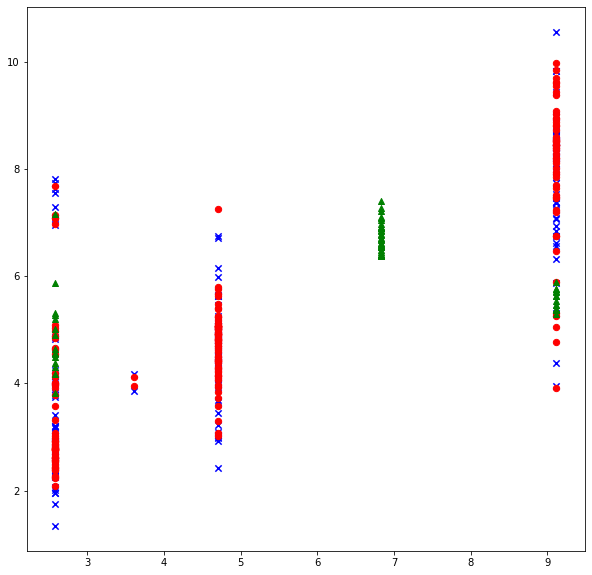

In [153]:
plt.scatter(results['Actual'], results['Predicted'], color = 'b', marker = 'x', s = 40)
plt.scatter(train_results['Actual'], train_results['Predicted'], color = 'r', marker = 'o', s = 40)
plt.scatter(oos_results['Actual'], oos_results['Predicted'], color = 'g', marker = '^')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [154]:
knn = KNeighborsRegressor(n_neighbors = 2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

knn.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1))
Y_pred = knn.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = knn.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 2.8702704188481674
r^2: 0.5919864031351634
Total r^2 score: 0.7136410909667417


In [155]:
OOS_pred = knn.predict(X_oos.reset_index().drop(['Reaction'], axis = 1))

oos_results = pd.concat([Y_oos.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
oos_results.head(30)

MSE: 3.7255296875
Mean Absolute Error 18: 2.130666666666666
Mean Absolute Error 19: 0.0
Mean Absolute Error 20: 2.1200000000000006
r^2: 0.29057244880236044


,Actual,Predicted
Reaction,,
Addition of enecarbamates to benzoyl imines 1,9.12,6.365
Addition of enecarbamates to benzoyl imines 2,9.12,6.365
Addition of enecarbamates to benzoyl imines 3,9.12,9.120
Addition of enecarbamates to benzoyl imines 4,9.12,9.120
Addition of enecarbamates to benzoyl imines 5,9.12,6.365
Addition of enecarbamates to benzoyl imines 6,9.12,6.365
Addition of enecarbamates to benzoyl imines 7,9.12,6.365
Addition of enecarbamates to benzoyl imines 8,9.12,6.365
Addition of enecarbamates to benzoyl imines 9,9.12,6.365


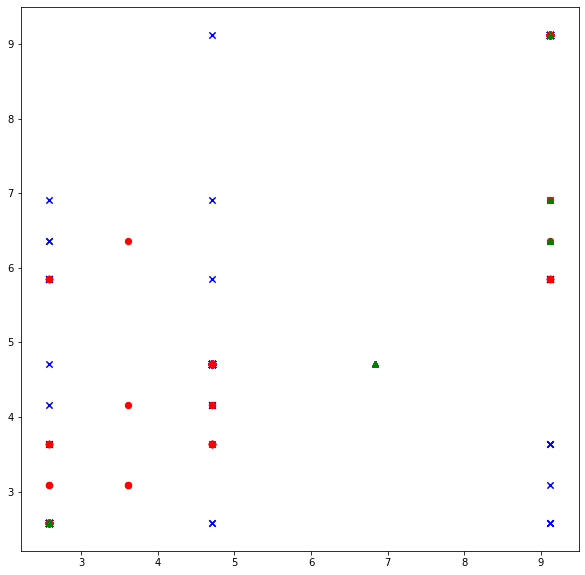

In [156]:
plt.scatter(results['Actual'], results['Predicted'], color = 'b', marker = 'x', s = 40)
plt.scatter(train_results['Actual'], train_results['Predicted'], color = 'r', marker = 'o', s = 40)
plt.scatter(oos_results['Actual'], oos_results['Predicted'], color = 'g', marker = '^')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [157]:
tree_model = DecisionTreeRegressor()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

tree_model.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1))
Y_pred = tree_model.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('test r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = tree_model.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 2.3259073298429316
test r^2: 0.6472918549586278
Total r^2 score: 0.8220047176860199


In [158]:
OOS_pred = tree_model.predict(X_oos.reset_index().drop(['Reaction'], axis = 1))

oos_results = pd.concat([Y_oos.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
oos_results.head(30)

MSE: 13.312621875000005
Mean Absolute Error 18: 6.540000000000003
Mean Absolute Error 19: 1.3973333333333329
Mean Absolute Error 20: 2.120000000000001
r^2: -1.5350330097997325


,Actual,Predicted
Reaction,,
Addition of enecarbamates to benzoyl imines 1,9.12,2.58
Addition of enecarbamates to benzoyl imines 2,9.12,2.58
Addition of enecarbamates to benzoyl imines 3,9.12,2.58
Addition of enecarbamates to benzoyl imines 4,9.12,2.58
Addition of enecarbamates to benzoyl imines 5,9.12,2.58
Addition of enecarbamates to benzoyl imines 6,9.12,2.58
Addition of enecarbamates to benzoyl imines 7,9.12,2.58
Addition of enecarbamates to benzoyl imines 8,9.12,2.58
Addition of enecarbamates to benzoyl imines 9,9.12,2.58


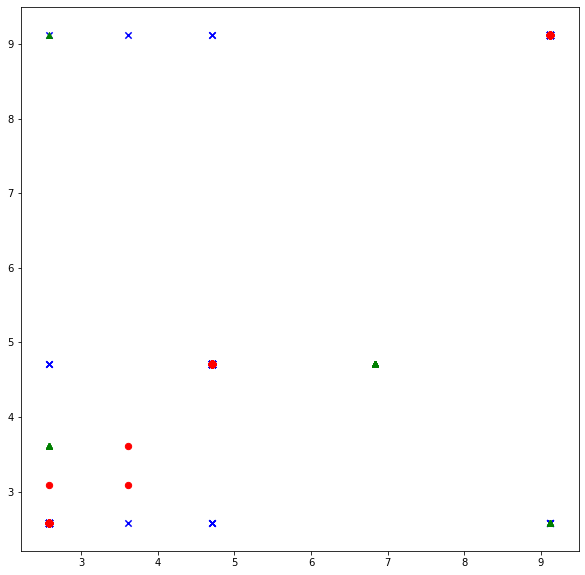

In [159]:
plt.scatter(results['Actual'], results['Predicted'], color = 'b', marker = 'x', s = 40)
plt.scatter(train_results['Actual'], train_results['Predicted'], color = 'r', marker = 'o', s = 40)
plt.scatter(oos_results['Actual'], oos_results['Predicted'], color = 'g', marker = '^')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [160]:
boosting_tree = GradientBoostingRegressor(max_depth = 3)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

boosting_tree.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
Y_pred = boosting_tree.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('test r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = boosting_tree.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']
train_results

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 1.4211703718892672
test r^2: 0.7756787788618141
Total r^2 score: 0.8758187888734007


In [161]:
OOS_pred = boosting_tree.predict(X_oos.reset_index().drop(['Reaction'], axis = 1))

oos_results = pd.concat([Y_oos.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
oos_results.head(30)

MSE: 5.1135104963651505
Mean Absolute Error 18: 1.916333581261419
Mean Absolute Error 19: 2.834677116123953
Mean Absolute Error 20: 2.0674752339504074
r^2: 0.026268602386555262


,Actual,Predicted
Reaction,,
Addition of enecarbamates to benzoyl imines 1,9.12,7.418105
Addition of enecarbamates to benzoyl imines 2,9.12,7.418105
Addition of enecarbamates to benzoyl imines 3,9.12,7.403958
Addition of enecarbamates to benzoyl imines 4,9.12,7.403958
Addition of enecarbamates to benzoyl imines 5,9.12,7.333607
Addition of enecarbamates to benzoyl imines 6,9.12,7.418105
Addition of enecarbamates to benzoyl imines 7,9.12,7.418105
Addition of enecarbamates to benzoyl imines 8,9.12,7.300391
Addition of enecarbamates to benzoyl imines 9,9.12,7.300391


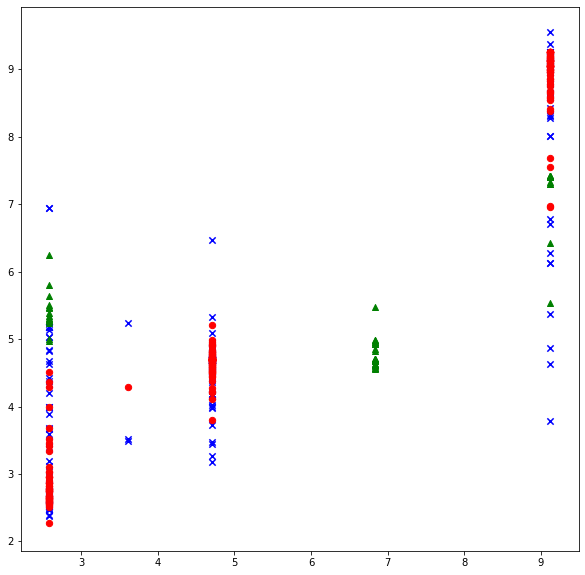

In [162]:
plt.scatter(results['Actual'], results['Predicted'], color = 'b', marker = 'x', s = 40)
plt.scatter(train_results['Actual'], train_results['Predicted'], color = 'r', marker = 'o', s = 40)
plt.scatter(oos_results['Actual'], oos_results['Predicted'], color = 'g', marker = '^')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [163]:
forest = RandomForestRegressor()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

forest.fit(X_train.reset_index().drop(['Reaction'], axis = 1), Y_train.reset_index().drop('Reaction', axis = 1).values.ravel())
Y_pred = forest.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_test, Y_pred)))
print('r^2: ' + str(r2_score(Y_test, Y_pred)))
results.head()

Y_train_pred = forest.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']
train_results
print('Train r^2 score:' + str(r2_score(train_results['Actual'], train_results['Predicted'])))

all_results = pd.concat([train_results, results])
all_results
print('Total r^2 score: ' + str(r2_score(all_results['Actual'], all_results['Predicted'])))

MSE: 2.2135383780104707
r^2: 0.6756479053184685
Train r^2 score:0.954521050677269
Total r^2 score: 0.8092139229436347


In [164]:
OOS_pred = forest.predict(X_oos.reset_index().drop(['Reaction'], axis = 1))

oos_results = pd.concat([Y_oos.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
oos_results.head(30)

MSE: 5.22829554093751
Mean Absolute Error 18: 3.02802
Mean Absolute Error 19: 2.5143799999999983
Mean Absolute Error 20: 1.7083647058823592
r^2: 0.004410858678780549


,Actual,Predicted
Reaction,,
Addition of enecarbamates to benzoyl imines 1,9.12,6.1728
Addition of enecarbamates to benzoyl imines 2,9.12,6.2169
Addition of enecarbamates to benzoyl imines 3,9.12,6.2169
Addition of enecarbamates to benzoyl imines 4,9.12,6.2169
Addition of enecarbamates to benzoyl imines 5,9.12,5.9979
Addition of enecarbamates to benzoyl imines 6,9.12,6.2169
Addition of enecarbamates to benzoyl imines 7,9.12,6.0861
Addition of enecarbamates to benzoyl imines 8,9.12,6.1728
Addition of enecarbamates to benzoyl imines 9,9.12,6.1728


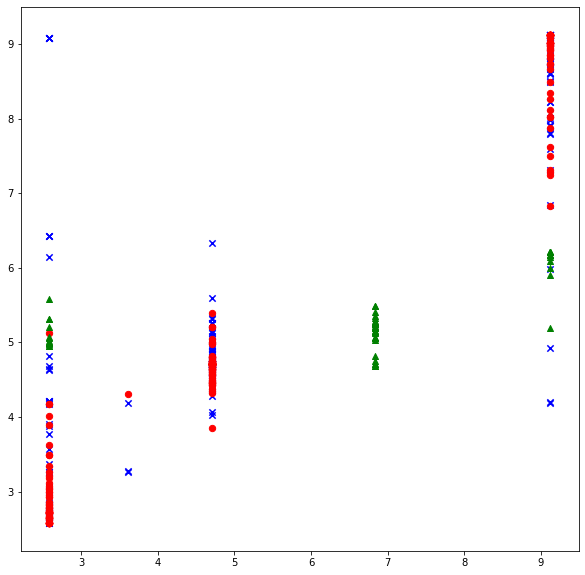

In [165]:
plt.scatter(results['Actual'], results['Predicted'], color = 'b', marker = 'x', s = 40)
plt.scatter(train_results['Actual'], train_results['Predicted'], color = 'r', marker = 'o', s = 40)
plt.scatter(oos_results['Actual'], oos_results['Predicted'], color = 'g', marker = '^')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

###############################################################################################################################

Classification

###############################################################################################################################

In [29]:
knn = KNeighborsClassifier()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_str, test_size = test_size, random_state = random_state)

knn.fit(np.array(X_train.reset_index().drop('Reaction', axis = 1)), np.array(Y_train.reset_index().drop('Reaction', axis = 1)).reshape(-1))
Y_pred = knn.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

Y_train_pred = knn.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']

count = 0
for reaction in results.index:
    if results.loc[reaction, 'Actual'] == results.loc[reaction, 'Predicted']:
        count += 1

print('# of correct test predictions: ' + str(count) + '/' + str(len(Y_test)))
print('test accuracy: ' + str(count/len(Y_test)))

train_count = 0
for reaction in train_results.index:
    if train_results.loc[reaction, 'Actual'] == train_results.loc[reaction, 'Predicted']:
        train_count += 1

print('# of correct train predictions: ' + str(train_count) + '/' + str(len(Y_train)))
print('train accuracy: ' + str(train_count/len(Y_train)))

# of correct test predictions: 151/191
test accuracy: 0.7905759162303665
# of correct train predictions: 165/190
train accuracy: 0.868421052631579


In [51]:
oos_results

,Actual,Predicted
Reaction,,
Addition of enecarbamates to benzoyl imines 1,9.12,2.58
Addition of enecarbamates to benzoyl imines 2,9.12,2.58
Addition of enecarbamates to benzoyl imines 3,9.12,9.12
Addition of enecarbamates to benzoyl imines 4,9.12,9.12
Addition of enecarbamates to benzoyl imines 5,9.12,2.58
...,...,...
Addition of thiols to imines (Denmark) 30,6.83,4.71
Addition of thiols to imines (Denmark) 31,6.83,4.71
Addition of thiols to imines (Denmark) 32,6.83,4.71


In [61]:
OOS_pred = knn.predict(X_oos.reset_index().drop(['Reaction'], axis = 1))

oos_results = pd.concat([Y_oos_str.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

count = 0
for reaction in oos_results.index:
    if oos_results.loc[reaction, 'Actual'] == oos_results.loc[reaction, 'Predicted']:
        count += 1

print('# of correct test predictions: ' + str(count) + '/' + str(len(Y_oos_str)))
print('test accuracy: ' + str(count/len(Y_oos_str)))

#print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
#print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
#print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
#print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
#print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
oos_results.head(30)

# of correct test predictions: 17/64
test accuracy: 0.265625


,Actual,Predicted
Reaction,,
Addition of enecarbamates to benzoyl imines 1,9.12,2.58
Addition of enecarbamates to benzoyl imines 2,9.12,2.58
Addition of enecarbamates to benzoyl imines 3,9.12,9.12
Addition of enecarbamates to benzoyl imines 4,9.12,9.12
Addition of enecarbamates to benzoyl imines 5,9.12,2.58
Addition of enecarbamates to benzoyl imines 6,9.12,2.58
Addition of enecarbamates to benzoyl imines 7,9.12,2.58
Addition of enecarbamates to benzoyl imines 8,9.12,2.58
Addition of enecarbamates to benzoyl imines 9,9.12,2.58


In [62]:
decision_tree = DecisionTreeClassifier()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_str, test_size = test_size, random_state = random_state)

decision_tree.fit(np.array(X_train.reset_index().drop('Reaction', axis = 1)), np.array(Y_train.reset_index().drop('Reaction', axis = 1)).reshape(-1))
Y_pred = decision_tree.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

Y_train_pred = decision_tree.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']

count = 0
for reaction in results.index:
    if results.loc[reaction, 'Actual'] == results.loc[reaction, 'Predicted']:
        count += 1

print('# of correct test predictions: ' + str(count) + '/' + str(len(Y_test)))
print('test accuracy: ' + str(count/len(Y_test)))

train_count = 0
for reaction in train_results.index:
    if train_results.loc[reaction, 'Actual'] == train_results.loc[reaction, 'Predicted']:
        train_count += 1

print('# of correct train predictions: ' + str(train_count) + '/' + str(len(Y_train)))
print('train accuracy: ' + str(train_count/len(Y_train)))

# of correct test predictions: 160/191
test accuracy: 0.837696335078534
# of correct train predictions: 177/190
train accuracy: 0.9315789473684211


In [64]:
OOS_pred = decision_tree.predict(X_oos.reset_index().drop(['Reaction'], axis = 1))

oos_results = pd.concat([Y_oos_str.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

count = 0
for reaction in oos_results.index:
    if oos_results.loc[reaction, 'Actual'] == oos_results.loc[reaction, 'Predicted']:
        count += 1

print('# of correct test predictions: ' + str(count) + '/' + str(len(Y_oos_str)))
print('test accuracy: ' + str(count/len(Y_oos_str)))

#print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
#print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
#print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
#print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
#print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
oos_results.head(30)

# of correct test predictions: 9/64
test accuracy: 0.140625


,Actual,Predicted
Reaction,,
Addition of enecarbamates to benzoyl imines 1,9.12,2.58
Addition of enecarbamates to benzoyl imines 2,9.12,2.58
Addition of enecarbamates to benzoyl imines 3,9.12,2.58
Addition of enecarbamates to benzoyl imines 4,9.12,2.58
Addition of enecarbamates to benzoyl imines 5,9.12,2.58
Addition of enecarbamates to benzoyl imines 6,9.12,2.58
Addition of enecarbamates to benzoyl imines 7,9.12,2.58
Addition of enecarbamates to benzoyl imines 8,9.12,2.58
Addition of enecarbamates to benzoyl imines 9,9.12,2.58


In [65]:
random_forest = RandomForestClassifier()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_str, test_size = test_size, random_state = random_state)

random_forest.fit(np.array(X_train.reset_index().drop('Reaction', axis = 1)), np.array(Y_train.reset_index().drop('Reaction', axis = 1)).reshape(-1))
Y_pred = random_forest.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

Y_train_pred = random_forest.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']

count = 0
for reaction in results.index:
    if results.loc[reaction, 'Actual'] == results.loc[reaction, 'Predicted']:
        count += 1

print('# of correct test predictions: ' + str(count) + '/' + str(len(Y_test)))
print('test accuracy: ' + str(count/len(Y_test)))

train_count = 0
for reaction in train_results.index:
    if train_results.loc[reaction, 'Actual'] == train_results.loc[reaction, 'Predicted']:
        train_count += 1

print('# of correct train predictions: ' + str(train_count) + '/' + str(len(Y_train)))
print('train accuracy: ' + str(train_count/len(Y_train)))

# of correct test predictions: 174/191
test accuracy: 0.9109947643979057
# of correct train predictions: 176/190
train accuracy: 0.9263157894736842


In [69]:
OOS_pred = random_forest.predict(X_oos.reset_index().drop(['Reaction'], axis = 1))

oos_results = pd.concat([Y_oos_str.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

count = 0
for reaction in oos_results.index:
    if oos_results.loc[reaction, 'Actual'] == oos_results.loc[reaction, 'Predicted']:
        count += 1

print('# of correct test predictions: ' + str(count) + '/' + str(len(Y_oos_str)))
print('test accuracy: ' + str(count/len(Y_oos_str)))

#print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
#print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
#print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
#print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
#print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
oos_results.tail(30)

# of correct test predictions: 15/64
test accuracy: 0.234375


,Actual,Predicted
Reaction,,
Addition of thiols to imines (Denmark) 5,6.83,4.71
Addition of thiols to imines (Denmark) 6,6.83,4.71
Addition of thiols to imines (Denmark) 7,6.83,4.71
Addition of thiols to imines (Denmark) 8,6.83,4.71
Addition of thiols to imines (Denmark) 9,6.83,4.71
Addition of thiols to imines (Denmark) 10,6.83,4.71
Addition of thiols to imines (Denmark) 11,6.83,4.71
Addition of thiols to imines (Denmark) 12,6.83,4.71
Addition of thiols to imines (Denmark) 13,6.83,4.71


In [67]:
log_reg = linear_model.LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_str, test_size = test_size, random_state = random_state)

log_reg.fit(np.array(X_train.reset_index().drop('Reaction', axis = 1)), np.array(Y_train.reset_index().drop('Reaction', axis = 1)).reshape(-1))
Y_pred = log_reg.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

Y_train_pred = log_reg.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']

count = 0
for reaction in results.index:
    if results.loc[reaction, 'Actual'] == results.loc[reaction, 'Predicted']:
        count += 1

print('# of correct test predictions: ' + str(count) + '/' + str(len(Y_test)))
print('test accuracy: ' + str(count/len(Y_test)))

train_count = 0
for reaction in train_results.index:
    if train_results.loc[reaction, 'Actual'] == train_results.loc[reaction, 'Predicted']:
        train_count += 1

print('# of correct train predictions: ' + str(train_count) + '/' + str(len(Y_train)))
print('train accuracy: ' + str(train_count/len(Y_train)))

# of correct test predictions: 139/191
test accuracy: 0.7277486910994765
# of correct train predictions: 155/190
train accuracy: 0.8157894736842105


C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [68]:
OOS_pred = log_reg.predict(X_oos.reset_index().drop(['Reaction'], axis = 1))

oos_results = pd.concat([Y_oos_str.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

count = 0
for reaction in oos_results.index:
    if oos_results.loc[reaction, 'Actual'] == oos_results.loc[reaction, 'Predicted']:
        count += 1

print('# of correct test predictions: ' + str(count) + '/' + str(len(Y_oos_str)))
print('test accuracy: ' + str(count/len(Y_oos_str)))

#print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
#print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
#print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
#print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
#print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
oos_results.head(30)

# of correct test predictions: 13/64
test accuracy: 0.203125


,Actual,Predicted
Reaction,,
Addition of enecarbamates to benzoyl imines 1,9.12,2.58
Addition of enecarbamates to benzoyl imines 2,9.12,2.58
Addition of enecarbamates to benzoyl imines 3,9.12,2.58
Addition of enecarbamates to benzoyl imines 4,9.12,2.58
Addition of enecarbamates to benzoyl imines 5,9.12,2.58
Addition of enecarbamates to benzoyl imines 6,9.12,2.58
Addition of enecarbamates to benzoyl imines 7,9.12,2.58
Addition of enecarbamates to benzoyl imines 8,9.12,2.58
Addition of enecarbamates to benzoyl imines 9,9.12,2.58


In [35]:
lda = LinearDiscriminantAnalysis()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_str, test_size = test_size, random_state = random_state)

lda.fit(np.array(X_train.reset_index().drop('Reaction', axis = 1)), np.array(Y_train.reset_index().drop('Reaction', axis = 1)).reshape(-1))
Y_pred = lda.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

Y_train_pred = lda.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']

count = 0
for reaction in results.index:
    if results.loc[reaction, 'Actual'] == results.loc[reaction, 'Predicted']:
        count += 1

print('# of correct test predictions: ' + str(count) + '/' + str(len(Y_test)))
print('test accuracy: ' + str(count/len(Y_test)))

train_count = 0
for reaction in train_results.index:
    if train_results.loc[reaction, 'Actual'] == train_results.loc[reaction, 'Predicted']:
        train_count += 1

print('# of correct train predictions: ' + str(train_count) + '/' + str(len(Y_train)))
print('train accuracy: ' + str(train_count/len(Y_train)))

# of correct test predictions: 168/191
test accuracy: 0.8795811518324608
# of correct train predictions: 173/190
train accuracy: 0.9105263157894737


In [60]:
OOS_pred = lda.predict(X_oos.reset_index().drop(['Reaction'], axis = 1))

oos_results = pd.concat([Y_oos_str.reset_index(), pd.DataFrame(OOS_pred)], axis = 1)
oos_results.set_index('Reaction', inplace = True)
oos_results.columns = ['Actual', 'Predicted']

count = 0
for reaction in oos_results.index:
    if oos_results.loc[reaction, 'Actual'] == oos_results.loc[reaction, 'Predicted']:
        count += 1

print('# of correct test predictions: ' + str(count) + '/' + str(len(Y_oos_str)))
print('test accuracy: ' + str(count/len(Y_oos_str)))

#print('MSE: ' + str(mean_squared_error(Y_oos, OOS_pred)))
#print('Mean Absolute Error 18: ' + str(mean_absolute_error(Y_oos.iloc[0:15, :], OOS_pred[0:15])))
#print('Mean Absolute Error 19: ' + str(mean_absolute_error(Y_oos.iloc[15:30, :], OOS_pred[15:30])))
#print('Mean Absolute Error 20: ' + str(mean_absolute_error(Y_oos.iloc[30:, :], OOS_pred[30:])))
#print('r^2: ' + str(r2_score(Y_oos, OOS_pred)))
oos_results.head(64)

# of correct test predictions: 15/64
test accuracy: 0.234375


,Actual,Predicted
Reaction,,
Addition of enecarbamates to benzoyl imines 1,9.12,4.71
Addition of enecarbamates to benzoyl imines 2,9.12,4.71
Addition of enecarbamates to benzoyl imines 3,9.12,4.71
Addition of enecarbamates to benzoyl imines 4,9.12,4.71
Addition of enecarbamates to benzoyl imines 5,9.12,4.71
...,...,...
Addition of thiols to imines (Denmark) 30,6.83,4.71
Addition of thiols to imines (Denmark) 31,6.83,4.71
Addition of thiols to imines (Denmark) 32,6.83,4.71


In [36]:
clf = svm.SVC()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_str, test_size = test_size, random_state = random_state)

clf.fit(np.array(X_train.reset_index().drop('Reaction', axis = 1)), np.array(Y_train.reset_index().drop('Reaction', axis = 1)).reshape(-1))
Y_pred = clf.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
results.set_index('Reaction', inplace = True)
results.columns = ['Actual', 'Predicted']

Y_train_pred = clf.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
train_results.set_index('Reaction', inplace = True)
train_results.columns = ['Actual', 'Predicted']

count = 0
for reaction in results.index:
    if results.loc[reaction, 'Actual'] == results.loc[reaction, 'Predicted']:
        count += 1

print('# of correct test predictions: ' + str(count) + '/' + str(len(Y_test)))
print('test accuracy: ' + str(count/len(Y_test)))

train_count = 0
for reaction in train_results.index:
    if train_results.loc[reaction, 'Actual'] == train_results.loc[reaction, 'Predicted']:
        train_count += 1

print('# of correct train predictions: ' + str(train_count) + '/' + str(len(Y_train)))
print('train accuracy: ' + str(train_count/len(Y_train)))

# of correct test predictions: 77/191
test accuracy: 0.4031413612565445
# of correct train predictions: 77/190
train accuracy: 0.4052631578947368


In [37]:
def run_knn(iterations):
    scores = pd.DataFrame(columns = ['iteration', 'test acc', 'train acc', 'total acc'])
    #scores.set_index('iteration', inplace = True)
    for i in range(iterations):
        #develop model & scores
        knn = KNeighborsClassifier()
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y_str, test_size = test_size, random_state = random_state)

        knn.fit(np.array(X_train.reset_index().drop('Reaction', axis = 1)), np.array(Y_train.reset_index().drop('Reaction', axis = 1)).reshape(-1))
        Y_pred = knn.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

        results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
        results.set_index('Reaction', inplace = True)
        results.columns = ['Actual', 'Predicted']

        Y_train_pred = knn.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
        train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
        train_results.set_index('Reaction', inplace = True)
        train_results.columns = ['Actual', 'Predicted']

        count = 0
        for reaction in results.index:
            if results.loc[reaction, 'Actual'] == results.loc[reaction, 'Predicted']:
                count += 1

        train_count = 0
        for reaction in train_results.index:
            if train_results.loc[reaction, 'Actual'] == train_results.loc[reaction, 'Predicted']:
                train_count += 1

        scores = scores.append({'iteration': i+1,
                    'test acc': count / len(Y_test),
                    'train acc': train_count / len(Y_train),
                    'total acc': (count + train_count) / (len(Y_test) + len(Y_train))
                               }, ignore_index = True)
        
    #add average for each row
    averages = pd.DataFrame(scores.mean(axis = 0)).T
    scores = scores.append({'iteration': 'average',
                           'test acc': averages.iloc[0,1],
                           'train acc': averages.iloc[0,2],
                           'total acc': averages.iloc[0,3]}, ignore_index = True)
    scores.set_index('iteration')
    
    return scores

In [39]:
def run_decision_tree(iterations):
    scores = pd.DataFrame(columns = ['iteration', 'test acc', 'train acc', 'total acc'])
    #scores.set_index('iteration', inplace = True)
    for i in range(iterations):
        #develop model & scores
        decision_tree = DecisionTreeClassifier()
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y_str, test_size = test_size, random_state = random_state)

        decision_tree.fit(np.array(X_train.reset_index().drop('Reaction', axis = 1)), np.array(Y_train.reset_index().drop('Reaction', axis = 1)).reshape(-1))
        Y_pred = decision_tree.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

        results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
        results.set_index('Reaction', inplace = True)
        results.columns = ['Actual', 'Predicted']

        Y_train_pred = decision_tree.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
        train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
        train_results.set_index('Reaction', inplace = True)
        train_results.columns = ['Actual', 'Predicted']

        count = 0
        for reaction in results.index:
            if results.loc[reaction, 'Actual'] == results.loc[reaction, 'Predicted']:
                count += 1

        train_count = 0
        for reaction in train_results.index:
            if train_results.loc[reaction, 'Actual'] == train_results.loc[reaction, 'Predicted']:
                train_count += 1

        scores = scores.append({'iteration': i+1,
                    'test acc': count / len(Y_test),
                    'train acc': train_count / len(Y_train),
                    'total acc': (count + train_count) / (len(Y_test) + len(Y_train))
                               }, ignore_index = True)
        
    #add average for each row
    averages = pd.DataFrame(scores.mean(axis = 0)).T
    scores = scores.append({'iteration': 'average',
                           'test acc': averages.iloc[0,1],
                           'train acc': averages.iloc[0,2],
                           'total acc': averages.iloc[0,3]}, ignore_index = True)
    scores.set_index('iteration')
    
    return scores

In [44]:
def run_random_forest(iterations):
    scores = pd.DataFrame(columns = ['iteration', 'test acc', 'train acc', 'total acc'])
    #scores.set_index('iteration', inplace = True)
    for i in range(iterations):
        #develop model & scores
        random_forest = RandomForestClassifier()
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y_str, test_size = test_size, random_state = random_state)

        random_forest.fit(np.array(X_train.reset_index().drop('Reaction', axis = 1)), np.array(Y_train.reset_index().drop('Reaction', axis = 1)).reshape(-1))
        Y_pred = random_forest.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

        results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
        results.set_index('Reaction', inplace = True)
        results.columns = ['Actual', 'Predicted']

        Y_train_pred = random_forest.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
        train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
        train_results.set_index('Reaction', inplace = True)
        train_results.columns = ['Actual', 'Predicted']

        count = 0
        for reaction in results.index:
            if results.loc[reaction, 'Actual'] == results.loc[reaction, 'Predicted']:
                count += 1

        train_count = 0
        for reaction in train_results.index:
            if train_results.loc[reaction, 'Actual'] == train_results.loc[reaction, 'Predicted']:
                train_count += 1

        scores = scores.append({'iteration': i+1,
                    'test acc': count / len(Y_test),
                    'train acc': train_count / len(Y_train),
                    'total acc': (count + train_count) / (len(Y_test) + len(Y_train))
                               }, ignore_index = True)
        #evaluating most important features
        features = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(random_forest.feature_importances_)], axis = 1)
        features.columns = ['Feature', 'Importance']
        features.set_index('Feature', inplace = True)
        
        if i == 0:
            total_features = features.sort_values(by = ['Importance'], ascending = False)
        else:
            for feature in total_features.index:
                total_features.loc[feature, 'Importance'] += features.loc[feature, 'Importance']
    
    #add average for each row
    averages = pd.DataFrame(scores.mean(axis = 0)).T
    scores = scores.append({'iteration': 'average',
                           'test acc': averages.iloc[0,1],
                           'train acc': averages.iloc[0,2],
                           'total acc': averages.iloc[0,3]}, ignore_index = True)
    scores.set_index('iteration')
    
    #which stage each important feature is in
    for feature in total_features.index:
        if feature in solvent_columns:
            total_features.loc[feature, 'type'] = 'solvent'
        elif feature in nucleophile_columns:
            total_features.loc[feature, 'type'] = 'nucleophile'
        elif feature in catalyst_columns:
            total_features.loc[feature, 'type'] = 'catalyst'
        elif feature in iminium_columns:
            total_features.loc[feature, 'type'] = 'iminium'

    total_features = total_features[['type', 'Importance']]
    total_features = total_features.sort_values(by = ['Importance'], ascending = False)
    
    return scores, total_features

In [40]:
def run_log_reg(iterations):
    scores = pd.DataFrame(columns = ['iteration', 'test acc', 'train acc', 'total acc'])
    #scores.set_index('iteration', inplace = True)
    for i in range(iterations):
        #develop model & scores
        log_reg = linear_model.LogisticRegression()
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y_str, test_size = test_size, random_state = random_state)

        log_reg.fit(np.array(X_train.reset_index().drop('Reaction', axis = 1)), np.array(Y_train.reset_index().drop('Reaction', axis = 1)).reshape(-1))
        Y_pred = log_reg.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

        results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
        results.set_index('Reaction', inplace = True)
        results.columns = ['Actual', 'Predicted']

        Y_train_pred = log_reg.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
        train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
        train_results.set_index('Reaction', inplace = True)
        train_results.columns = ['Actual', 'Predicted']

        count = 0
        for reaction in results.index:
            if results.loc[reaction, 'Actual'] == results.loc[reaction, 'Predicted']:
                count += 1

        train_count = 0
        for reaction in train_results.index:
            if train_results.loc[reaction, 'Actual'] == train_results.loc[reaction, 'Predicted']:
                train_count += 1

        scores = scores.append({'iteration': i+1,
                    'test acc': count / len(Y_test),
                    'train acc': train_count / len(Y_train),
                    'total acc': (count + train_count) / (len(Y_test) + len(Y_train))
                               }, ignore_index = True)
        
    #add average for each row
    averages = pd.DataFrame(scores.mean(axis = 0)).T
    scores = scores.append({'iteration': 'average',
                           'test acc': averages.iloc[0,1],
                           'train acc': averages.iloc[0,2],
                           'total acc': averages.iloc[0,3]}, ignore_index = True)
    scores.set_index('iteration')
    
    return scores

In [41]:
def run_lda(iterations):
    scores = pd.DataFrame(columns = ['iteration', 'test acc', 'train acc', 'total acc'])
    #scores.set_index('iteration', inplace = True)
    for i in range(iterations):
        #develop model & scores
        lda = LinearDiscriminantAnalysis()
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y_str, test_size = test_size, random_state = random_state)

        lda.fit(np.array(X_train.reset_index().drop('Reaction', axis = 1)), np.array(Y_train.reset_index().drop('Reaction', axis = 1)).reshape(-1))
        Y_pred = lda.predict(X_test.reset_index().drop(['Reaction'], axis = 1))

        results = pd.concat([Y_test.reset_index(), pd.DataFrame(Y_pred)], axis = 1)
        results.set_index('Reaction', inplace = True)
        results.columns = ['Actual', 'Predicted']

        Y_train_pred = lda.predict(X_train.reset_index().drop(['Reaction'], axis = 1))
        train_results = pd.concat([Y_train.reset_index(), pd.DataFrame(Y_train_pred)], axis = 1)
        train_results.set_index('Reaction', inplace = True)
        train_results.columns = ['Actual', 'Predicted']

        count = 0
        for reaction in results.index:
            if results.loc[reaction, 'Actual'] == results.loc[reaction, 'Predicted']:
                count += 1
                
        train_count = 0
        for reaction in train_results.index:
            if train_results.loc[reaction, 'Actual'] == train_results.loc[reaction, 'Predicted']:
                train_count += 1
        
        scores = scores.append({'iteration': i+1,
                    'test acc': count / len(Y_test),
                    'train acc': train_count / len(Y_train),
                    'total acc': (count + train_count) / (len(Y_test) + len(Y_train))
                               }, ignore_index = True)
        
    #add average for each row
    averages = pd.DataFrame(scores.mean(axis = 0)).T
    scores = scores.append({'iteration': 'average',
                           'test acc': averages.iloc[0,1],
                           'train acc': averages.iloc[0,2],
                           'total acc': averages.iloc[0,3]}, ignore_index = True)
    scores.set_index('iteration')
    
    return scores

In [38]:
run_knn(10)

,iteration,test acc,train acc,total acc
0,1,0.806283,0.884211,0.845144
1,2,0.837696,0.863158,0.850394
2,3,0.806283,0.889474,0.847769
3,4,0.853403,0.868421,0.860892
4,5,0.842932,0.889474,0.866142
5,6,0.827225,0.857895,0.842520
6,7,0.816754,0.889474,0.853018
7,8,0.795812,0.852632,0.824147
8,9,0.848168,0.878947,0.863517
9,10,0.780105,0.900000,0.839895


In [42]:
run_decision_tree(100)

,iteration,test acc,train acc,total acc
0,1,0.848168,0.936842,0.892388
1,2,0.842932,0.952632,0.897638
2,3,0.905759,0.905263,0.905512
3,4,0.806283,0.926316,0.866142
4,5,0.869110,0.931579,0.900262
...,...,...,...,...
96,97,0.821990,0.952632,0.887139
97,98,0.780105,0.921053,0.850394
98,99,0.816754,0.936842,0.876640
99,100,0.842932,0.931579,0.887139


In [45]:
score, feature = run_random_forest(100)
score

,iteration,test acc,train acc,total acc
0,1,0.848168,0.926316,0.887139
1,2,0.890052,0.926316,0.908136
2,3,0.869110,0.942105,0.905512
3,4,0.863874,0.931579,0.897638
4,5,0.879581,0.921053,0.900262
...,...,...,...,...
96,97,0.863874,0.936842,0.900262
97,98,0.869110,0.931579,0.900262
98,99,0.879581,0.921053,0.900262
99,100,0.869110,0.936842,0.902887


In [49]:
feature.head(20)

,type,Importance
Feature,,
iXH,nucleophile,3.891431
B1,nucleophile,3.425446
N,iminium,3.326906
C,iminium,3.279059
B5,nucleophile,3.063501
PG,iminium,2.997225
electronic energy difference (kcal/mol),iminium,2.538374
PGL,iminium,2.537919
nXH,nucleophile,2.380351


In [46]:
run_log_reg(100)

C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jlisd\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

,iteration,test acc,train acc,total acc
0,1,0.722513,0.789474,0.755906
1,2,0.727749,0.800000,0.763780
2,3,0.780105,0.768421,0.774278
3,4,0.712042,0.826316,0.769029
4,5,0.769634,0.726316,0.748031
...,...,...,...,...
96,97,0.701571,0.831579,0.766404
97,98,0.701571,0.778947,0.740157
98,99,0.774869,0.805263,0.790026
99,100,0.691099,0.742105,0.716535


In [47]:
run_lda(100)

,iteration,test acc,train acc,total acc
0,1,0.890052,0.878947,0.884514
1,2,0.821990,0.884211,0.853018
2,3,0.858639,0.852632,0.855643
3,4,0.806283,0.921053,0.863517
4,5,0.811518,0.910526,0.860892
...,...,...,...,...
96,97,0.842932,0.873684,0.858268
97,98,0.842932,0.936842,0.889764
98,99,0.842932,0.889474,0.866142
99,100,0.842932,0.910526,0.876640
